In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wushidiguo","key":"ebbb05c154408b088bb86ee8ffbf0a30"}'}

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
# 修改权限
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 77.6MB/s]
 98% 266M/271M [00:02<00:00, 89.3MB/s]
100% 271M/271M [00:02<00:00, 113MB/s] 
100% 543M/543M [00:06<00:00, 144MB/s]
100% 543M/543M [00:06<00:00, 92.7MB/s]


In [0]:
!ls

adc.json  drive  sample_data  sampleSubmission.csv  test1.zip  train.zip


In [0]:
!unzip train.zip

In [0]:
import os, shutil

In [0]:
# 原train数据集有25000张图像，猫和狗各一半，现在将其缩小为train2000,validation1000,test1000的小数据集。
original_dataset_dir = "/content/train"

base_dir = "/content/sample_data/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [0]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
for dir in [train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir, test_cats_dir, test_dogs_dir]:
  print(dir, len(os.listdir(dir)))

/content/sample_data/cats_and_dogs_small/train/cats 1000
/content/sample_data/cats_and_dogs_small/train/dogs 1000
/content/sample_data/cats_and_dogs_small/validation/cats 500
/content/sample_data/cats_and_dogs_small/validation/dogs 500
/content/sample_data/cats_and_dogs_small/test/cats 500
/content/sample_data/cats_and_dogs_small/test/dogs 500


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# ImageDataGenerator可以对图像进行很多处理，详见https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# 生成器按照子文件夹给数据分配标签，cat:0, dog:1，在循环过程中给出大小为(20, 150, 150, 3)的batchs，和大小为(20,)的binary labels。生成器会将所有图片resize成150x150。
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
# train_generator会不停地生成数据，因此必须与step_per_epoch结合使用，告诉model迭代多少个batch才算是完成一个epoch。validation_data亦同（也可传入tuple），通过validation_steps确定验证数据的数量。
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)




Epoch 1/30





100/100 [==============================] - 109s 1s/step - loss: 0.6972 - acc: 0.5300 - val_loss: 0.6804 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.6661 - acc: 0.5965 - val_loss: 0.6554 - val_acc: 0.6020
Epoch 3/30
100/100 [==============================] - 108s 1s/step - loss: 0.6262 - acc: 0.6530 - val_loss: 0.6372 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5775 - acc: 0.6955 - val_loss: 0.6365 - val_acc: 0.6440
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5395 - acc: 0.7205 - val_loss: 0.5939 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.5160 - acc: 0.7415 - val_loss: 0.5862 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4850 - acc: 0.7665 - val_loss: 0.5720 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 108s 1s

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_1.h5")

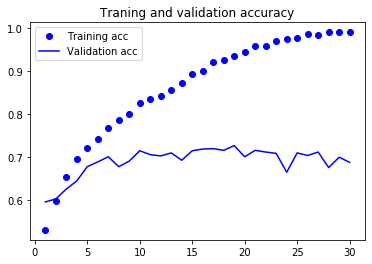

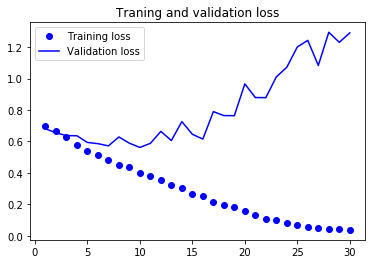

In [0]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Traning and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traning and validation loss")
plt.legend()

plt.show()

可以看到大概经过7个epoch后，模型就开始过拟合了。为了对抗过拟合，通过data augmentation增加数据，并且在flatten层之后，dense层之前增加dropout层。

In [0]:
# data augmentation
# rotation_range:随机旋转 width_shift,height_shift:随机平移 shear_range:随机剪切 zoom_range:随机缩放 horizontal_flip:随机将一半图像水平翻转 fill_mode:对新像素作何处理
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

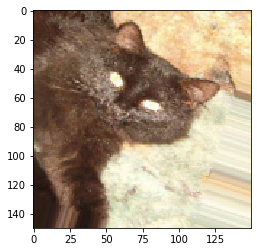

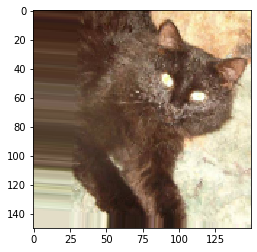

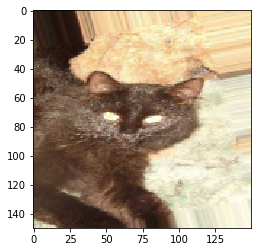

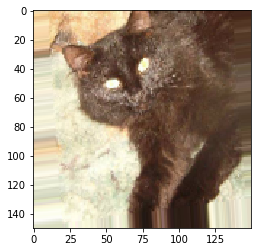

In [0]:
# 查看死猫变换图片
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

# 读取图像并resize.
img = image.load_img(img_path, target_size=(150, 150))

# 将图像array化。
x = image.img_to_array(img)

# (150, 150, 3)→(1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0

# ImageDataGenerator的flow函数接收的x是4D tensor
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  # 生成器不会自动停止，要暴力打断。
  if i % 4 == 0:
    break

  # 靠北，这猫也太丑了。要不要考虑换一只。
  plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# 验证数据就别折腾了。
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 183s 2s/step - loss: 0.6899 - acc: 0.5347 - val_loss: 0.6709 - val_acc: 0.5971
Epoch 2/100
100/100 [==============================] - 178s 2s/step - loss: 0.6734 - acc: 0.5788 - val_loss: 0.6487 - val_acc: 0.6218
Epoch 3/100
100/100 [==============================] - 179s 2s/step - loss: 0.6598 - acc: 0.5972 - val_loss: 0.6301 - val_acc: 0.6358
Epoch 4/100
100/100 [==============================] - 179s 2s/step - loss: 0.6380 - acc: 0.6222 - val_loss: 0.6158 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 176s 2s/step - loss: 0.6329 - acc: 0.6372 - val_loss: 0.6162 - val_acc: 0.6504
Epoch 6/100
100/100 [==============================] - 180s 2s/step - loss: 0.6159 - acc: 0.6516 - val_loss: 0.5778 - val_acc: 0.6791
Epoch 7/100
100/100 [==============================] - 177s 2s/step - loss: 0.6003 - acc: 0.6725 - val_loss: 0.6263 - val_acc: 0.6548
Epoch 8/100
100/100 [==============================] - 178s 2s

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_2.h5")

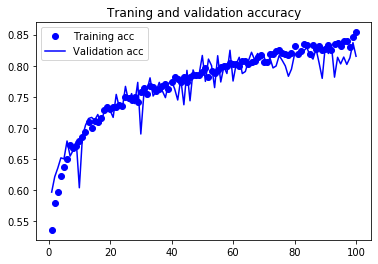

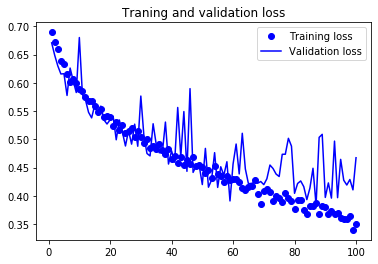

In [0]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Traning and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traning and validation loss")
plt.legend()

plt.show()